In [78]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import math

from datetime import datetime
from datetime import timedelta
import datetime

from scipy import spatial
from numpy import array
from numpy import corrcoef
from scipy.spatial import distance

from sklearn.preprocessing import MinMaxScaler

def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_cossine(v1,v2):
    return (1 - spatial.distance.cosine(v1, v2))

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

def dist_correlation(dc):
    return math.sqrt(2 *(1 - dc))

def measure_angle(arcc):
    return math.degrees(np.arccos(arcc))

def measure(v1,v2):
    #return measure_correlation(v1,v2)
    return measure_correlation(v1,v2)

In [79]:
datasete = pd.DataFrame()
path = (os.path.abspath(".")) + "/../../../ds/supertrunfo/datasete/"
filename = "s3.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=";", dtype={
    'nome': str, 'vel': float, 'hp':float, 't':float, 'cc':float,
    'type': float, 'cil': float,'m':float
   })


In [80]:
df.head(10)

,nome,vel,hp,t,cc,type,cil,m
0,ford_granada_ghia_3.0,180.0,138.0,11.0,2993.0,1.0,6.0,1365.0
1,opel_diplomat_v_8,205.0,230.0,10.0,5354.0,1.0,8.0,1690.0
2,bmw_3.3_li,210.0,200.0,9.0,3295.0,0.0,6.0,1350.0
3,rolls-royce_camargue,190.0,200.0,12.0,6750.0,1.0,8.0,2347.0
4,rover_3500_s,190.0,141.0,11.0,3470.0,1.0,8.0,1360.0
5,lotus_elite_502,200.0,150.0,8.0,1973.0,0.0,4.0,1060.0
6,alfa_romeo_2000_Spider,198.0,131.0,11.0,1962.0,0.0,4.0,1045.0
7,mercedes_450_sl,215.0,225.0,9.0,4520.0,1.0,8.0,1580.0
8,panther_j_72_v_12,220.0,269.0,6.0,5343.0,1.0,12.0,1350.0
9,buick_century,170.0,165.0,12.0,5665.0,1.0,8.0,1860.0


In [81]:
df.columns

Index(['nome', 'vel', 'hp', 't', 'cc', 'type', 'cil', 'm'], dtype='object')

In [82]:
df.describe()

,vel,hp,t,cc,type,cil,m
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,201.869565,184.000000,9.913043,3747.565217,0.652174,6.608696,1424.869565
std,27.343446,73.947156,2.391520,1790.157378,0.486985,1.947939,371.976209
min,170.000000,93.000000,5.000000,1647.000000,0.000000,4.000000,870.000000
25%,185.000000,137.000000,8.500000,2505.500000,0.000000,6.000000,1210.000000
50%,195.000000,165.000000,11.000000,2993.000000,1.000000,6.000000,1350.000000
75%,212.500000,200.000000,11.500000,5348.500000,1.000000,8.000000,1590.000000
max,290.000000,450.000000,13.000000,7325.000000,1.000000,12.000000,2347.000000


In [83]:
columns = ['nome']
df.drop(columns, inplace=True, axis=1)
df.head(50)

,vel,hp,t,cc,type,cil,m
0,180.0,138.0,11.0,2993.0,1.0,6.0,1365.0
1,205.0,230.0,10.0,5354.0,1.0,8.0,1690.0
2,210.0,200.0,9.0,3295.0,0.0,6.0,1350.0
3,190.0,200.0,12.0,6750.0,1.0,8.0,2347.0
4,190.0,141.0,11.0,3470.0,1.0,8.0,1360.0
5,200.0,150.0,8.0,1973.0,0.0,4.0,1060.0
6,198.0,131.0,11.0,1962.0,0.0,4.0,1045.0
7,215.0,225.0,9.0,4520.0,1.0,8.0,1580.0
8,220.0,269.0,6.0,5343.0,1.0,12.0,1350.0
9,170.0,165.0,12.0,5665.0,1.0,8.0,1860.0


In [84]:
df.describe()

,vel,hp,t,cc,type,cil,m
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,201.869565,184.000000,9.913043,3747.565217,0.652174,6.608696,1424.869565
std,27.343446,73.947156,2.391520,1790.157378,0.486985,1.947939,371.976209
min,170.000000,93.000000,5.000000,1647.000000,0.000000,4.000000,870.000000
25%,185.000000,137.000000,8.500000,2505.500000,0.000000,6.000000,1210.000000
50%,195.000000,165.000000,11.000000,2993.000000,1.000000,6.000000,1350.000000
75%,212.500000,200.000000,11.500000,5348.500000,1.000000,8.000000,1590.000000
max,290.000000,450.000000,13.000000,7325.000000,1.000000,12.000000,2347.000000


In [85]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [86]:
df

,vel,hp,t,cc,type,cil,m
0,0.083333,0.126050,0.750,0.237055,1.0,0.25,0.335139
1,0.291667,0.383754,0.625,0.652871,1.0,0.50,0.555179
2,0.333333,0.299720,0.500,0.290243,0.0,0.25,0.324983
3,0.166667,0.299720,0.875,0.898732,1.0,0.50,1.000000
4,0.166667,0.134454,0.750,0.321064,1.0,0.50,0.331754
5,0.250000,0.159664,0.375,0.057415,0.0,0.00,0.128639
6,0.233333,0.106443,0.750,0.055477,0.0,0.00,0.118483
7,0.375000,0.369748,0.500,0.505988,1.0,0.50,0.480704
8,0.416667,0.492997,0.125,0.650933,1.0,1.00,0.324983
9,0.000000,0.201681,0.875,0.707644,1.0,0.50,0.670278


           vel        hp         t        cc      type       cil         m
vel   1.000000  0.890693 -0.905902  0.244568  0.057882  0.279764 -0.255310
hp    0.890693  1.000000 -0.763376  0.597451  0.277692  0.544655  0.101070
t    -0.905902 -0.763376  1.000000 -0.116480 -0.027151 -0.339383  0.355309
cc    0.244568  0.597451 -0.116480  1.000000  0.594996  0.744768  0.789432
type  0.057882  0.277692 -0.027151  0.594996  1.000000  0.712500  0.473990
cil   0.279764  0.544655 -0.339383  0.744768  0.712500  1.000000  0.497828
m    -0.255310  0.101070  0.355309  0.789432  0.473990  0.497828  1.000000


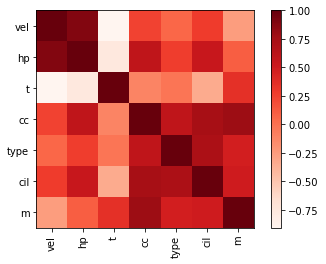

In [87]:
print(df.corr())
plt.imshow(df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

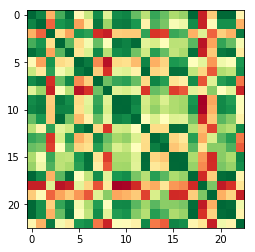

In [88]:
plt.imshow(df.T.corr(), cmap=plt.cm.RdYlGn)
plt.savefig('dataset3.pdf')
plt.show()

In [89]:
matriz_cor = df.T.corr()
print(matriz_cor)
dfm = pd.DataFrame(matriz_cor)
filename = "s3_matrix_corr_pearson2.csv"
dfm.to_csv(path+filename)



          0         1         2         3         4         5         6   \
0   1.000000  0.879834 -0.368563  0.690046  0.964305 -0.023903  0.268144   
1   0.879834  1.000000 -0.612163  0.812482  0.870107 -0.415995 -0.121979   
2  -0.368563 -0.612163  1.000000 -0.190697 -0.415387  0.813506  0.758287   
3   0.690046  0.812482 -0.190697  1.000000  0.639075 -0.206041  0.071757   
4   0.964305  0.870107 -0.415387  0.639075  1.000000 -0.147866  0.187883   
5  -0.023903 -0.415995  0.813506 -0.206041 -0.147866  1.000000  0.916526   
6   0.268144 -0.121979  0.758287  0.071757  0.187883  0.916526  1.000000   
7   0.850112  0.935559 -0.791108  0.600628  0.860551 -0.487309 -0.255991   
8   0.160347  0.434253 -0.845907  0.029821  0.332350 -0.899332 -0.771428   
9   0.847009  0.904201 -0.258352  0.937508  0.838133 -0.206476  0.145260   
10  0.877420  0.918789 -0.275660  0.891315  0.883188 -0.182345  0.178834   
11  0.601820  0.805505 -0.272453  0.980472  0.562803 -0.323610 -0.071260   
12  0.324395